In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
import matplotlib.pyplot as plt

In [2]:
scClass_path = !cd ../..;pwd
scClass_path = str(scClass_path.n)
import sys; sys.path.append(scClass_path)
import scClass
from scClass.main import Model

## Data Collection

In [3]:
data_name = 'HTD_Thymic'
adata = sc.read_h5ad(f'../../../dataset/{data_name}.h5ad')

Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.


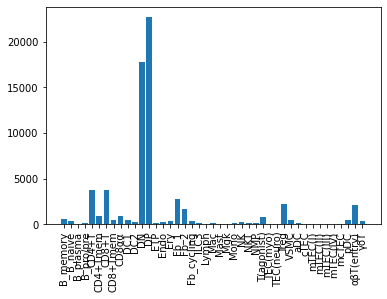

array(['B_memory', 'B_naive', 'B_plasma', 'B_pro/pre', 'CD4+T',
       'CD4+Tmem', 'CD8+T', 'CD8+Tmem', 'CD8αα', 'DC1', 'DC2', 'DN', 'DP',
       'ETP', 'Endo', 'Ery', 'Fb_1', 'Fb_2', 'Fb_cycling', 'ILC3',
       'Lymph', 'Mac', 'Mast', 'Mgk', 'Mono', 'NK', 'NKT', 'NMP',
       'T(agonist)', 'TEC(myo)', 'TEC(neuro)', 'Treg', 'VSMC', 'aDC',
       'cTEC', 'mTEC(I)', 'mTEC(II)', 'mTEC(III)', 'mTEC(IV)', 'mcTEC',
       'pDC', 'αβT(entry)', 'γδT'], dtype=object)

In [4]:
# plot cell type distribution
x,y = np.unique(adata.obs['origin cell type'],return_counts=True)
plt.figure(figsize=(6,4))
plt.bar(x,y)
plt.xticks(rotation=90)
plt.show()
label_y=x; label_y

## Dataset Preprocessing

In [5]:
# get gene on model
gene = np.array([g[:15] for g in adata.var['ensembl_ids']])
adata = scClass.transmodel(adata,gene=gene,gene_ref='ensembl_ids')

/home/shhsu/.local/lib/python3.9/site-packages/anndata/_core/anndata.py:120: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.


get gene seq...
0% 8% 17% 25% 34% 42% 51% 59% 68% 77% 85% 94% 
Of 58347 genes in the input file, 45471 were found in the training set of 45468 genes.
mapping to model...
0% 51% 

In [6]:
# Normalized
adata = scClass.normalize_simple(adata)

Observation names are not unique. To make them unique, call `.obs_names_make_unique`.


## Classifier

In [7]:
model = scClass.load()

loading model from:  /home/shhsu/download/scClass_docker/scClass/scClass_modelA/scClass/data/model_train.pkl


0% 15% 30% 46% 61% 77% 92% 

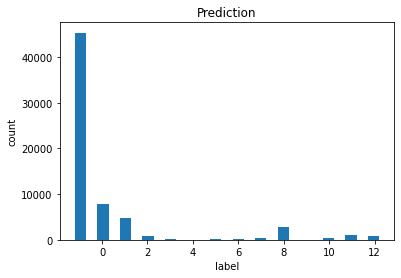

In [8]:
y_pred = scClass.predict_batch(adata,model,batch_size=10_000)

In [9]:
scClass.save_predict(y_pred)

label stored in: './output/cell_type_20220307_191608.csv'


## Compare

In [16]:
df = pd.read_excel("../../../dataset/preprocessing/Supplementary table.xlsx", sheet_name=data_name)
trans_table = df[['origin cell type','modelA id']].values.astype(str)
trans_table

array([['B_memory', '2'],
       ['B_naive', '3'],
       ['B_plasma', '4'],
       ['B_pro/pre', '5'],
       ['CD4+T', '0'],
       ['CD4+Tmem', '0'],
       ['CD8+T', '1'],
       ['CD8+Tmem', '1'],
       ['CD8αα', '1'],
       ['DC1', '11'],
       ['DC2', '11'],
       ['DN', '-1'],
       ['DP', '-1'],
       ['ETP', '-1'],
       ['Endo', '-1'],
       ['Ery', '8'],
       ['Fb_1', '-1'],
       ['Fb_2', '-1'],
       ['Fb_cycling', '-1'],
       ['ILC3', '-1'],
       ['Lymph', '-1'],
       ['Mac', '-1'],
       ['Mast', '-1'],
       ['Mgk', '9'],
       ['Mono', '10'],
       ['NK', '7'],
       ['NKT', '-1'],
       ['NMP', '-1'],
       ['T(agonist)', '-1'],
       ['TEC(myo)', '-1'],
       ['TEC(neuro)', '-1'],
       ['Treg', '0'],
       ['VSMC', '-1'],
       ['aDC', '11'],
       ['cTEC', '-1'],
       ['mTEC(I)', '-1'],
       ['mTEC(II)', '-1'],
       ['mTEC(III)', '-1'],
       ['mTEC(IV)', '-1'],
       ['mcTEC', '-1'],
       ['pDC', '11'],
       ['αβT(entry)

In [17]:
label = adata.obs['modelA id']
anno = adata.obs['origin cell type']

,label
-1,unknown
0,T-helper cell
1,cytotoxic T cell
2,memory B cell
3,naive B cell
4,plasma cell
5,precursor B cell
6,pro-B cell
7,natural killer cell
8,erythrocyte

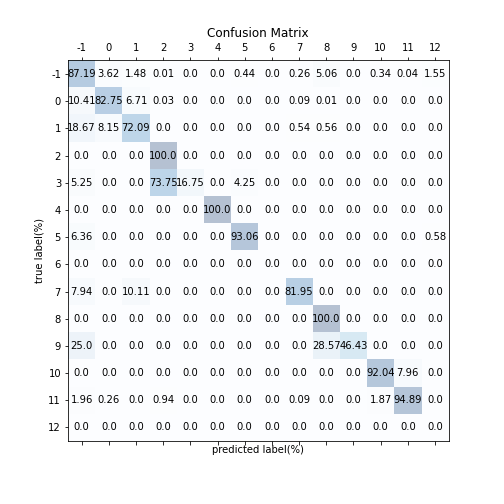

In [18]:
fig = scClass.confusion_matrix(y_pred=y_pred,y_true=label,_filter=False)
scClass.figure_html(fig)

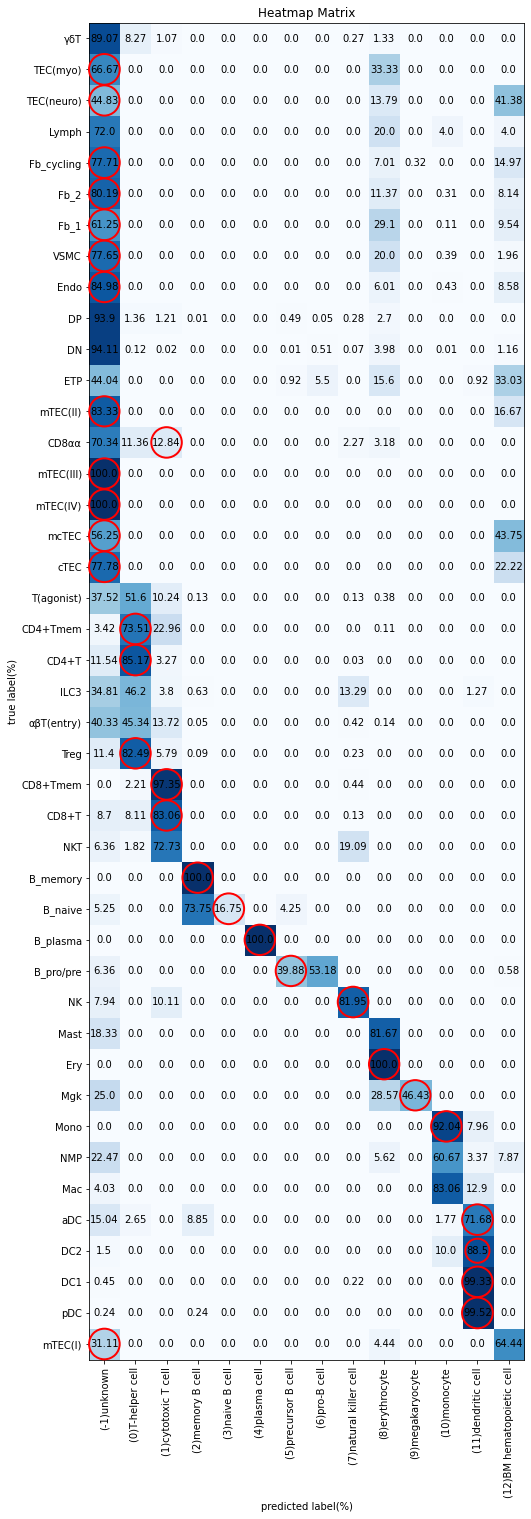

In [14]:
scClass.heatmap_matrix(y_pred=y_pred,y_true=anno,table=trans_table)

In [19]:
y_pred[y_pred==6] = 5 # pre/pro B Cell
scClass.plot_performance(y_pred=y_pred,y_true=label)

,Performance,Value
0,accuary,0.854143
1,precision,0.805960
2,recall,0.701053
3,f1-score,0.667177
